<a href="https://colab.research.google.com/github/joekibz/moringa-wk4/blob/main/Wk4_Wed_Project_Introduction_to_Regression_Project_%5BJoseph_Thiongo%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problem Statement 

Mobile carrier Megaline has found out that many of their subscribers use legacy plans.
They want to develop a model that would analyze subscribers' behavior and recommend
one of Megaline's newer plans:<b> Smart or Ultra.</b>
<br><br>
You have access to behavior data about subscribers who have already switched to the
new plans (from the project for the Statistical Data Analysis course). For this
classification task, you need to develop a model that will pick the right plan. Since you’ve
already performed the data preprocessing step, you can move straight to creating the
model.


#Project Evaluation


Here’s what the reviewers will look at when reviewing your project:<br><br>
● How did you look into data after downloading?<br>
● Have you correctly split the data into train, validation, and test sets?<br>
● How have you chosen the sets' sizes?<br>
● Did you evaluate the quality of the models correctly?<br>
● What models and hyperparameters did you use?<br>
● What are your findings?<br>
● Did you test the models correctly?<br>
● What is your accuracy score?<br>
● Have you stuck to the project structure and kept the code neat?<br>

#Success Criteria

Develop a model with the highest possible accuracy. In this project, the threshold for
<b>accuracy is 0.75.</b> Check the accuracy using the test dataset.

#Methodology

● Data Importation <br>
● Data Exploration <br>
● Data Cleaning <br>
● Data Preparation <br>
● Data Modeling <br>
● Model Evaluation, Hyparameter Tuning <br>
● Findings and Recommendations <br>

#1- Data Importation

In [128]:
#Import the libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


In [129]:
#Import the data
data = pd.read_csv("https://bit.ly/UsersBehaviourTelco")

#explore the data shape
print(f"There are {len(data)} rows in the Dataset")
print(f"The Dataset has {data.shape[1]} features")
data.head()

There are 3214 rows in the Dataset
The Dataset has 5 features


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [130]:
#Dataset info
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [131]:
#Dataset random sample
data.sample(8)

,calls,minutes,messages,mb_used,is_ultra
1690,115.0,860.75,7.0,18766.26,1
2899,7.0,77.22,0.0,3310.05,1
3205,59.0,412.81,16.0,14105.03,0
675,31.0,176.40,31.0,16673.38,0
2835,16.0,107.72,16.0,5289.33,0
1658,111.0,899.74,0.0,26866.61,0
3194,88.0,598.92,3.0,17715.02,0
1260,84.0,558.21,46.0,19240.03,1


In [132]:
#Statistical Summary of the Dataset
data.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


#2- Data Exploration

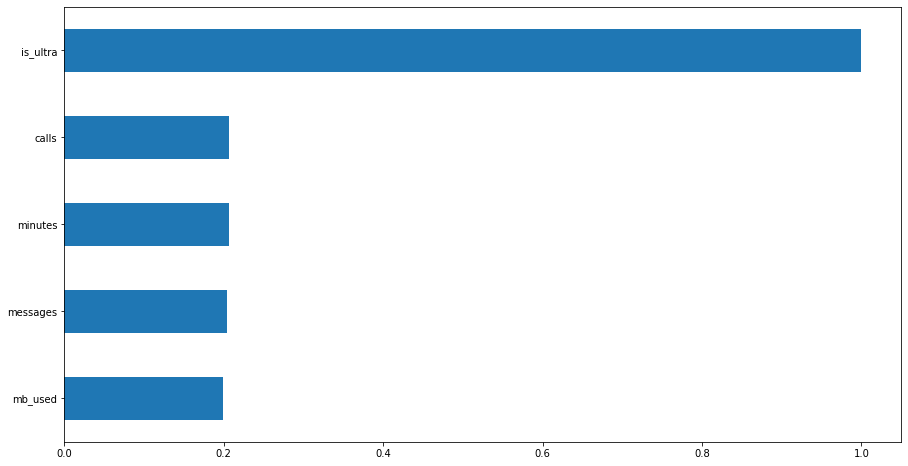

In [133]:
#Explore Correlation of 'target' with other variables:
plt.figure(figsize=(15,8))
data.corr()['is_ultra'].sort_values().plot(kind='barh');


Some mild imbalance noted in 'target' set...



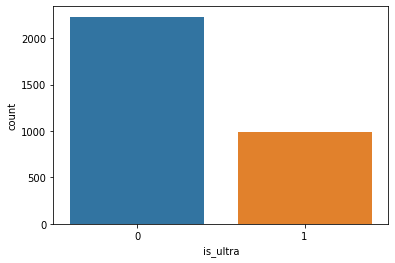

In [134]:
#Exploring +ve, -ve outcomes in the dataset 
print("Some mild imbalance noted in 'target' set...\n")
sns.countplot(x='is_ultra',data=data);

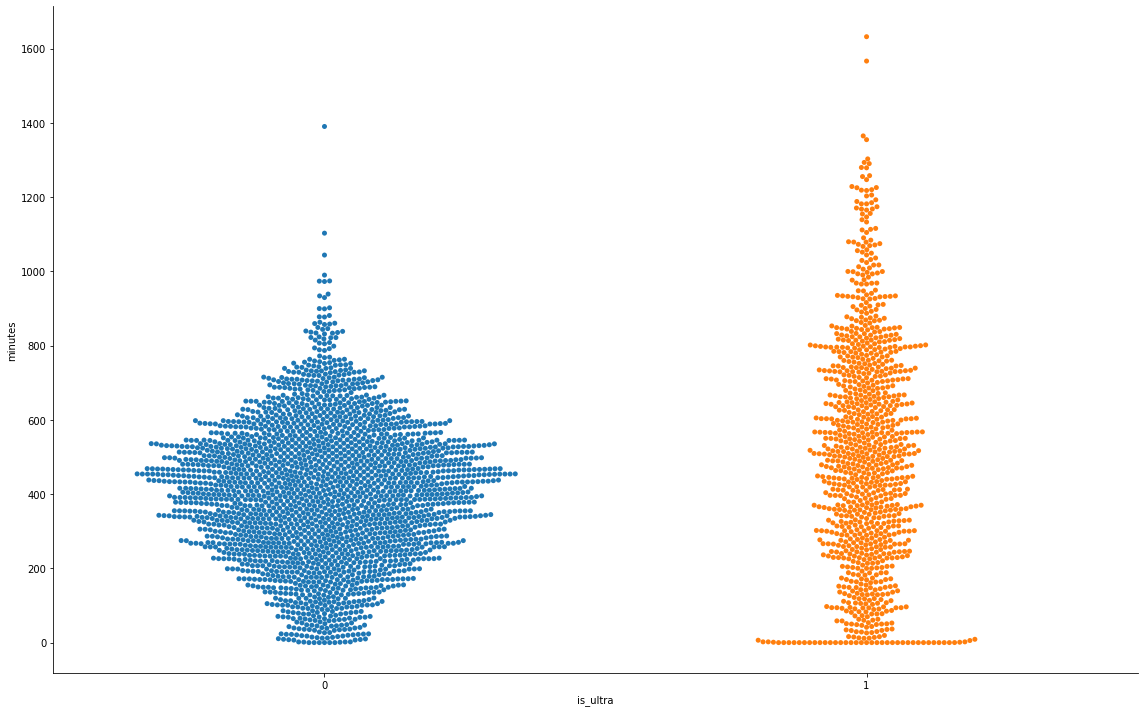

In [135]:
#Exploring minutes used among the 2 target groups
sns.catplot(x="is_ultra",y="minutes",data=data,kind="swarm",height=10, aspect=1.6);


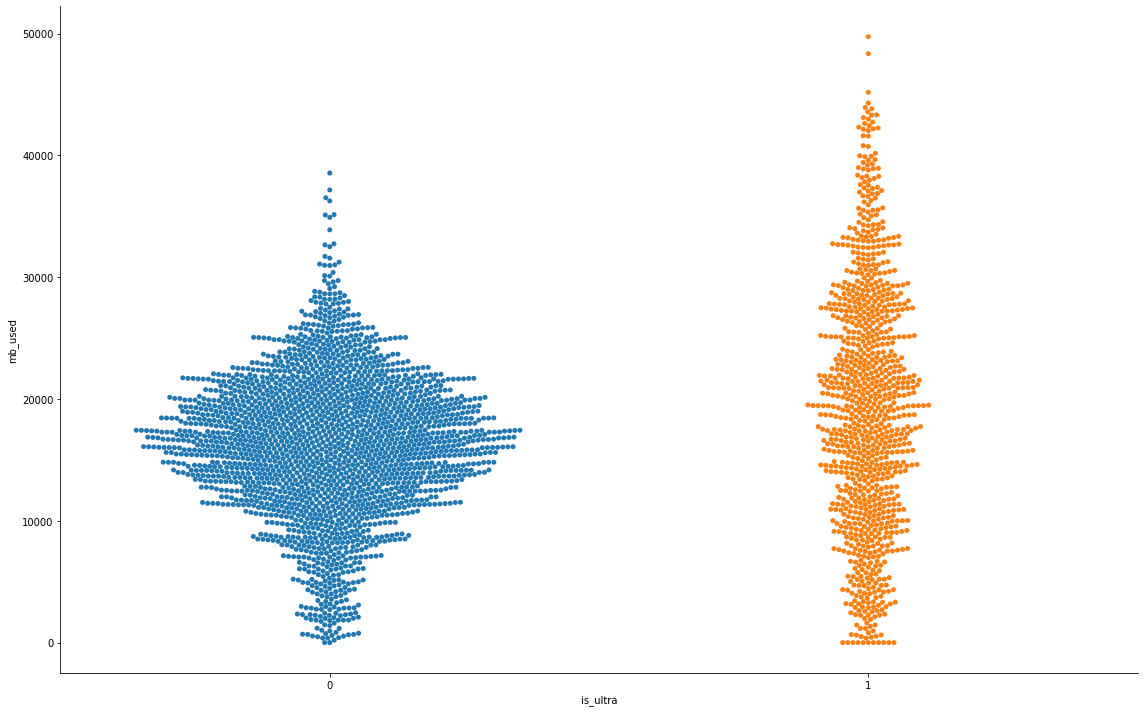

In [136]:
#Exploring mb_used used among the 2 target groups
sns.catplot(x="is_ultra",y="mb_used",data=data,kind="swarm",height=10, aspect=1.6);

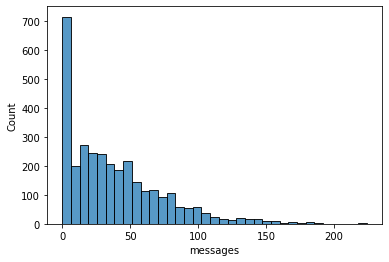

In [137]:
#Exploring messages distribution in dataset
sns.histplot(data, x="messages");

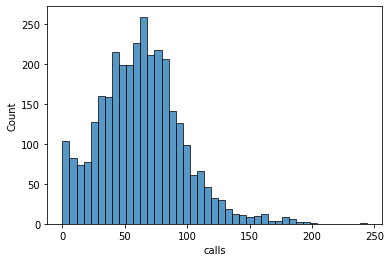

In [138]:
#Exploring calls distribution in dataset
sns.histplot(data, x="calls");

Text(0.5, 1.0, 'Distribution of minutes by target group')

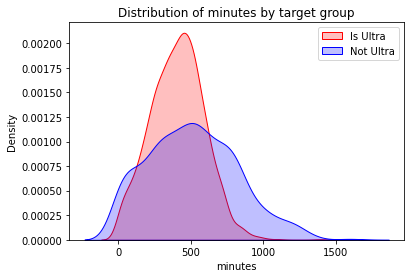

In [139]:
#Exploring density of observations in target group based on minutes

ax = sns.kdeplot(data.minutes[(data["is_ultra"] == 0) ],
                color="Red", shade = True)
ax = sns.kdeplot(data.minutes[(data["is_ultra"] == 1) ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Is Ultra","Not Ultra"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('minutes')
ax.set_title('Distribution of minutes by target group')

#3- Data Cleaning

In [140]:
#Check for nulls

print("No nulls found in data set ...\n");
data.isnull().sum()

No nulls found in data set ...



calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

In [141]:
#check for duplicates

print("No duplicates found in data set ...\n");
dp=data[data.duplicated()]
dp.head()

No duplicates found in data set ...



,calls,minutes,messages,mb_used,is_ultra


In [142]:
#checking cardinality
data.nunique()

calls        184
minutes     3144
messages     180
mb_used     3203
is_ultra       2
dtype: int64

#4- Data Preparation

In [143]:
#Define features and target set
target="is_ultra"
X=data.drop(target, axis=1)
y=data[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3214, 4)
y shape: (3214,)


In [144]:
#Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

y_train1 = y_train
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2571, 4)
y_train shape: (2571,)
X_test shape: (643, 4)
y_test shape: (643,)


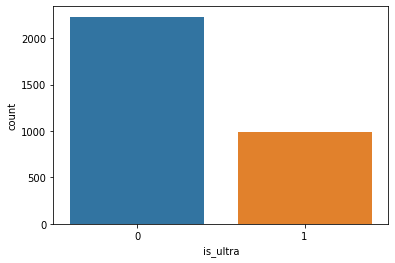

In [165]:
#Increase sample size due to mild imbalance noted earlier in dataset  
sns.countplot(x=data['is_ultra']);


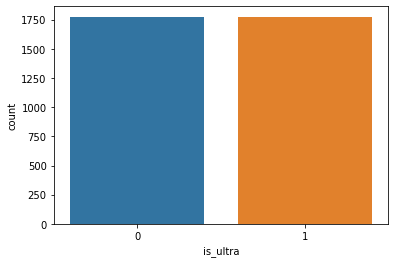

In [146]:
#using smote for resample

smt = SMOTE(random_state=42)
X_train, y_train = smt.fit_resample(X_train, y_train)
sns.countplot(x=y_train);

In [147]:
#check new df shape
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print(X_train.head())

X_train shape: (3548, 4)
y_train shape: (3548,)
   calls  minutes  messages   mb_used
0   20.0   104.02       8.0  15873.88
1   97.0   760.53      77.0  20246.27
2   10.0    78.67       8.0   4986.91
3   91.0   604.39      19.0  25152.82
4   67.0   505.20      25.0  16225.71


In [148]:
#Do feature scaling

sc = StandardScaler()
X_train= pd.DataFrame(sc.fit_transform(X_train))
X_test= pd.DataFrame(sc.transform(X_test))



In [149]:
#X_train.head()
X_test.head()

,0,1,2,3
0,-0.566580,-0.481516,-0.154278,-0.762252
1,-0.767172,-0.870310,-1.069321,0.317751
2,-0.767172,-0.808234,-1.069321,0.260323
3,-0.853140,-0.917830,-0.572583,0.681066
4,-0.881796,-1.021790,0.290172,2.071448


#5- Data Modelling

In [150]:
#Calculate baseline 
acc_baseline = y_train1.value_counts(normalize=True).max()
print("Baseline Accuracy:", round(acc_baseline, 4))

Baseline Accuracy: 0.69


In [151]:
#set classifier
clf = RandomForestClassifier(random_state=42)

In [152]:

#Create grid for hyperparameter search test
params = {
    "n_estimators": range(25,101,25),
    "max_depth": range(10,51,10)
}
params

{'n_estimators': range(25, 101, 25), 'max_depth': range(10, 51, 10)}

In [153]:

#Create gridSearch model ...
model = GridSearchCV(
    clf,
    param_grid=params,
    cv=5,
    n_jobs=1,
    verbose=1
)
model

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)},
             verbose=1)

In [154]:
# Train model
model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=1,
             param_grid={'max_depth': range(10, 51, 10),
                         'n_estimators': range(25, 101, 25)},
             verbose=1)

#6- Model Evaluation

In [155]:
# Extract best hyperparameters
print("Below the best hyperparameter values...\n")
model.best_params_

Below the best hyperparameter values...



{'max_depth': 30, 'n_estimators': 100}

In [156]:
#Calculate training and test accuracy scores for the model
acc_train = model.score(X_train, y_train)
acc_test = model.score(X_test, y_test)
rf_y_pred= model.predict(X_test)

print("Training Accuracy:", round(acc_train, 4))
print("Test Accuracy:", round(acc_test, 4))

Training Accuracy: 1.0
Test Accuracy: 0.7714


In [157]:
##Exploring other models to check if possible to get better Test Accuracy scores
#1- AdaBoost Algorithm

m_ada = AdaBoostClassifier(random_state=42)
m_ada.fit(X_train,y_train)
ada_y_pred = m_ada.predict(X_test)
accuracy_score(y_test, ada_y_pred)


0.7822706065318819

In [158]:
#2- XGBoost Classifier

m_xgb = XGBClassifier(random_state=42)
m_xgb.fit(X_train, y_train)
xgb_y_pred = m_xgb.predict(X_test)
accuracy_score(y_test, xgb_y_pred)

0.7744945567651633

In [159]:
#3- Logistic Regression
m_lg = LogisticRegression(random_state=42)
m_lg.fit(X_train, y_train)
lg_y_pred = m_lg.predict(X_test)
accuracy_score(y_test, lg_y_pred)
#print(classification_report(y_test,rf_y_pred))

0.6158631415241057

#7- Findings and Recommendations

In [160]:
#main RF model performance report 
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       455
           1       0.60      0.66      0.63       188

    accuracy                           0.77       643
   macro avg       0.73      0.74      0.73       643
weighted avg       0.78      0.77      0.77       643



In [161]:
#Analyze confusion matrix
y_test.value_counts()

0    455
1    188
Name: is_ultra, dtype: int64

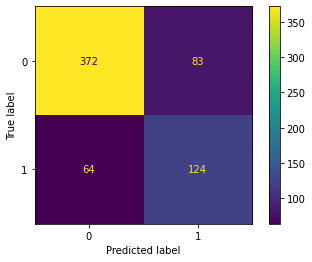

In [162]:
#Plot confusion matrix 
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

In [163]:
#Ranking all the models tested side-by-side
model = ["RandomForest", "ADABoost", "XGBoost", "LogisticRegression"]


md_accuracy = [
    accuracy_score(y_test, rf_y_pred ),
    accuracy_score(y_test, ada_y_pred),
    accuracy_score(y_test, xgb_y_pred),
    accuracy_score(y_test, lg_y_pred)
]

compare = pd.DataFrame({  
    "Model": model,
    "Accuracy Score": md_accuracy
    
})

print(compare)

                Model  Accuracy Score
0        RandomForest        0.771384
1            ADABoost        0.782271
2             XGBoost        0.774495
3  LogisticRegression        0.615863


<h3><b>Summary</b></h3>
The random forest classifier used had an accuracy > 75% on the test data set.<br>
Project success criteria has been met.<br>
However, best performing model on multiple trials during this task was XGBoost 